# Analisis Kecocokan Objek Menggunakan Algoritma SIFT dan Histogram RGB

### Nama : Mochamad Ilham Afriandhi
### NPM : 06.2018.1.06943

In [128]:
import matplotlib, cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [129]:
#read data set
data1 = cv2.imread('./Data1.png')
data2 = cv2.imread('./Data2.png')
hasil = cv2.imread('./Hasil.png')

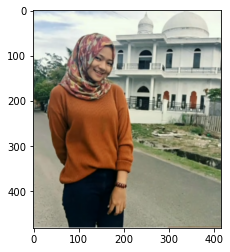

In [130]:
#ouput data set pertama
data1 = cv2.cvtColor(data1, cv2.COLOR_BGR2RGB)
plt.imshow(data1)

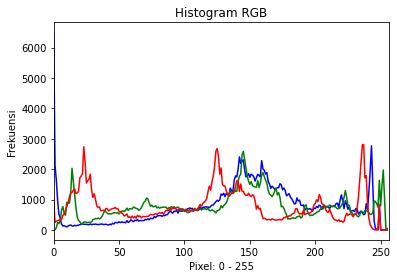

In [131]:
#mencari histogram rgb data pertama
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([data1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title("Histogram RGB")
plt.xlabel('Pixel: 0 - 255')
plt.ylabel('Frekuensi')
plt.show()

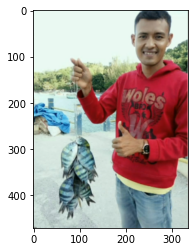

In [132]:
#output data set kedua
data2 = cv2.cvtColor(data2, cv2.COLOR_BGR2RGB)
plt.imshow(data2)

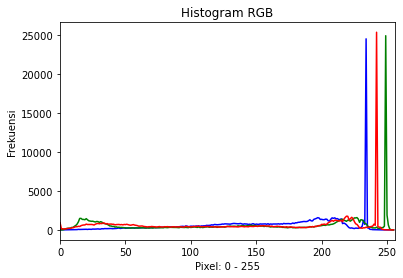

In [133]:
#mencari histogram rgb data kedua
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([data2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title("Histogram RGB")
plt.xlabel('Pixel: 0 - 255')
plt.ylabel('Frekuensi')
plt.show()

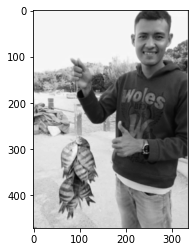

In [134]:
#ubah ke grayscale
gray_data = cv2.cvtColor(data2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_data, cmap='gray', vmin=0, vmax=255)

### Lanjutan Source Code dari Meet Terakhir

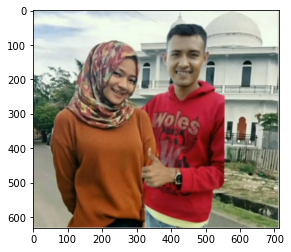

In [135]:
#ouput data set hasil
hasil = cv2.cvtColor(hasil, cv2.COLOR_BGR2RGB)
plt.imshow(hasil)

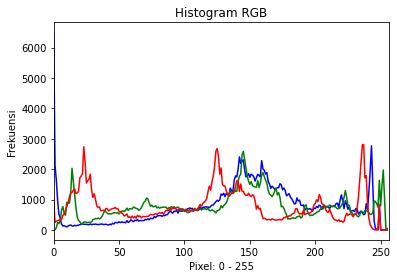

In [141]:
#mencari histogram rgb hasil
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([data1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title("Histogram RGB")
plt.xlabel('Pixel: 0 - 255')
plt.ylabel('Frekuensi')
plt.show()

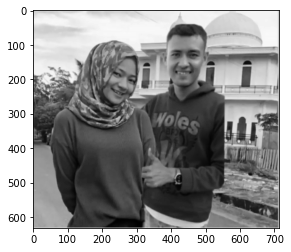

In [136]:
#ubah ke grayscale
gray_hasil = cv2.cvtColor(hasil, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_hasil, cmap='gray', vmin=0, vmax=255)

In [137]:
#cari keypoint menggunakan algoritma sift
sift =  cv2.xfeatures2d.SIFT_create()
key_hasil, describe_hasil = sift.detectAndCompute(gray_hasil, None)
key_data, describe_data = sift.detectAndCompute(gray_data, None)

In [138]:
#matching dengan brute force
bf = cv2.BFMatcher(cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS, crossCheck=True)
matches = bf.match(describe_hasil, describe_data)
matches = sorted(matches, key = lambda x:x.distance)
matching_result = cv2.drawMatches(gray_hasil, key_hasil, gray_data, key_data, matches[:75], None)

In [139]:
#ouput
cv2.imshow("Hasil", matching_result)
cv2.waitKey(0)
cv2.destroyAllWindows()